In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
%matplotlib inline

In [92]:
table = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8",attrs={"class": "wikitable collapsible collapsed"},encoding="Utf-8" , thousands="'",decimal=',')[3]
print(table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

In [93]:
print(table.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [94]:
print(table.shape)

(28, 9)


In [95]:
table = table.replace("—",np.nan)

In [96]:
print(table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [97]:
table["2014"] = pd.to_numeric(table["2014"], errors='coerce').astype('float64')
table["2019"] = pd.to_numeric(table["2019"], errors='coerce').astype('float64')

In [98]:
sum = np.sum(table.isnull())
print(sum)


Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


C:\Users\kybav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [99]:
table = table.iloc[:-1]

In [100]:
for row in table:
    try:
        table[row] = table[row].fillna(table[row].mean())
    except:
        pass


In [101]:
for num in table["2019"]:
    if num > table["2019"].mean():
        a = table.index[table["2019"] == num][0]
        print(table.iloc[a]["Регіон"])      

Волинська
Закарпатська
Івано-Франківська
Львівська
Івано-Франківська
Рівненська
Херсонська
Чернівецька
Київ


In [102]:
print(table.nlargest(1,"2014"))

        Регіон  1950  1960  1970  1990  2000  2012  2014  2019
16  Рівненська  26.9  26.7  19.3  15.8  11.8  15.9  14.8  10.7


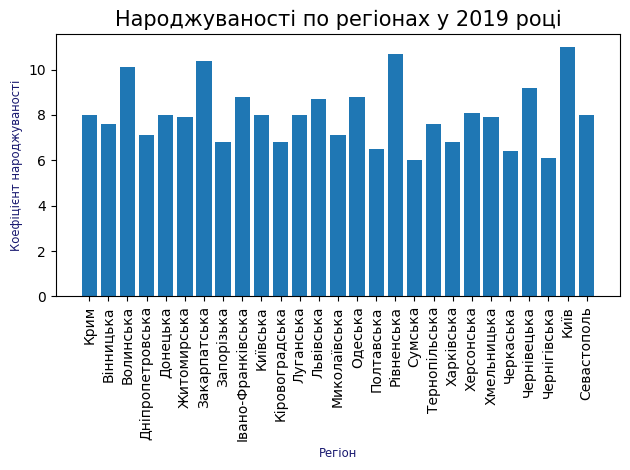

In [103]:

plt.bar(table["Регіон"],table["2019"])
plt.xlabel("Регіон", fontsize="small", color="midnightblue")
plt.ylabel("Коефіцієнт народжуваності", fontsize="small", color="midnightblue")
plt.title("Народжуваності по регіонах у 2019 році", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

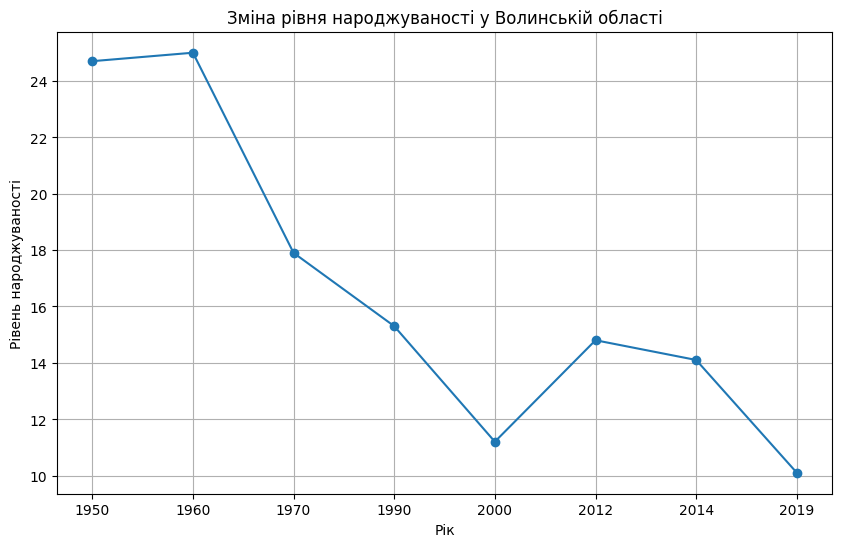

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(table.columns[1:], table.loc[table['Регіон'] == 'Волинська'].values.flatten()[1:], marker='o')
plt.title('Зміна рівня народжуваності у Волинській області')
plt.xlabel('Рік')
plt.ylabel('Рівень народжуваності')
plt.grid(True)
plt.show()

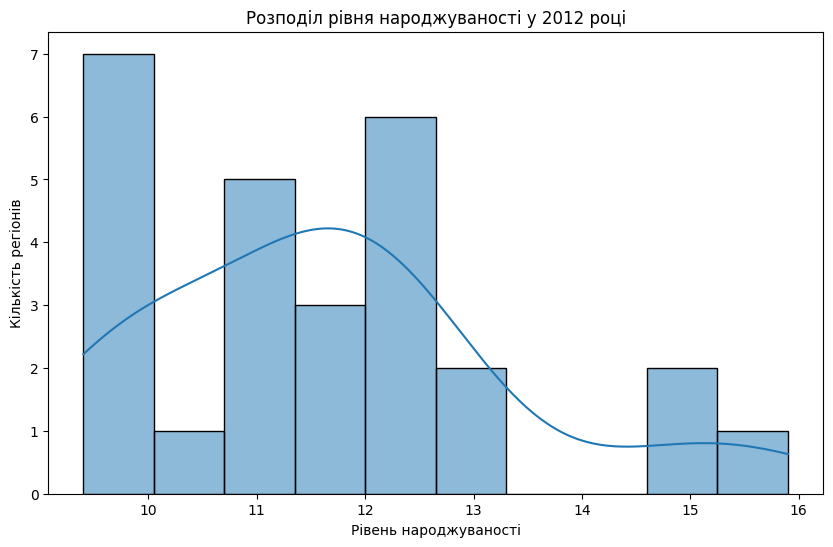

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(table['2012'], bins=10, kde=True)
plt.title('Розподіл рівня народжуваності у 2012 році')
plt.xlabel('Рівень народжуваності')
plt.ylabel('Кількість регіонів')
plt.show()

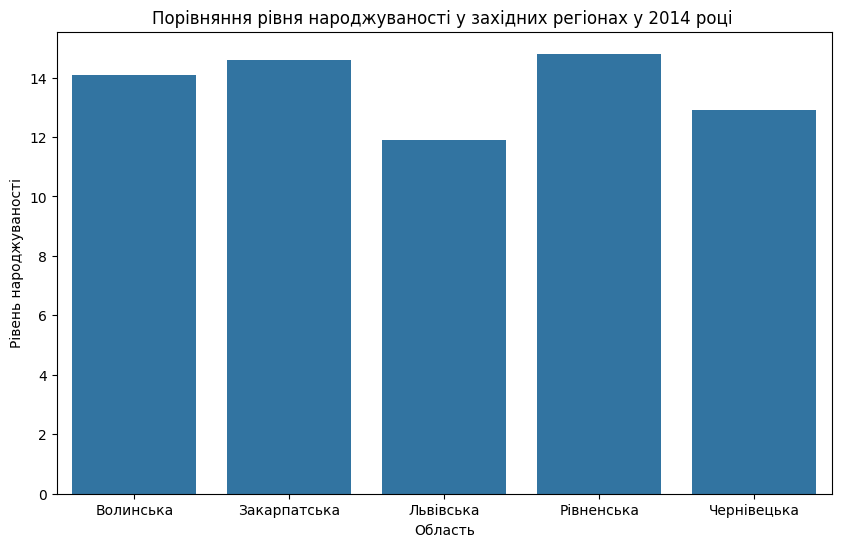

In [106]:
selected_regions = ['Волинська', 'Закарпатська', 'Львівська', 'Рівненська', 'Чернівецька']
selected_df = table[table['Регіон'].isin(selected_regions)]
plt.figure(figsize=(10, 6))
sns.barplot(x='Регіон', y='2014', data=selected_df)
plt.title('Порівняння рівня народжуваності у західних регіонах у 2014 році ')
plt.xlabel('Область')
plt.ylabel('Рівень народжуваності')
plt.show()